### Ce notebook contient les exercices du cours ["Algorithmes à noyaux"](http://cedric.cnam.fr/vertigo/Cours/ml2/tpAlgosNoyaux.html) proposé par le CNAM.
#### Pour les notes de cours, voir [DAUCE_W2](http://localhost:8888/notebooks/Documents/LabBooks/DAUCE-W2.ipynb).

In [1]:
%matplotlib inline

## OCSVM pour estimer la densité

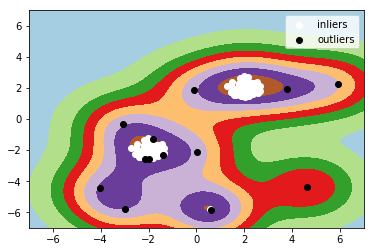

In [2]:
import numpy as np
import pylab as pl
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
X = 0.3 * np.random.randn(100, 2)
X = np.r_[X + 2, X - 2]

# Ajouter 10 % de 'outliers' (ce qui nous conduit à utiliser un nu=0.1)
X = np.r_[X, np.random.uniform(low=-6, high=6, size=(10, 2))]

# Construire le model
    # Plus gamma est grand, plus la sphère est fittée aux données
    # Plus nu est grand, plus le modèle est stricte dans la sélection des inliers
clf = svm.OneClassSVM(nu=0.06, kernel="rbf", gamma=0.25)
clf.fit(X)

# Afficher les points et les vecteurs les plus proches de du plan de séparation
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

pl.set_cmap(pl.cm.Paired)
pl.contourf(xx, yy, Z)
pl.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', label='inliers')
pl.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
pl.axis('tight')
pl.legend()
pl.show();

## Régression avec SVM

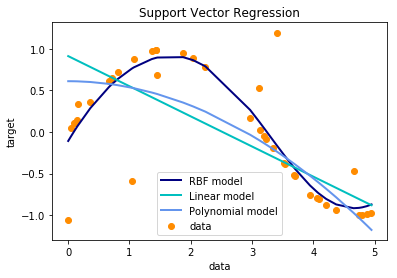

In [3]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Génerer les données
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
# Ajouter du bruit
y[::5] += 3 * (0.5 - np.random.rand(8))

# Apprentissage avec les trois noyaux
C = 1e3 # Plus C est grand, plus les modèles sont alignés avec les données
        # C trop petit entraine un estimateur trop lisse (sous-apprentissage)
        # C trop grand entraine un estimateur prenant trop en compte le bruit (sur-apprentissage)
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_lin = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Afficher les résultats
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()